# Reinforcement Learning Explained

## Imports

In [68]:
import gym
import numpy as np
import matplotlib.pylab as plt
from collections import OrderedDict
plt.style.use(['science'])

## Environment

In [2]:
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False)

In [3]:
env.action_space

Discrete(4)

In [4]:
env.observation_space

Discrete(16)

In [5]:
# Remove comments of this cell if you would like to visualize the Frozen Lake envrionment
#env.reset()
#env.render()

## Greedy Epsilon Algorithm

In [6]:
def act(state):
    rand = np.random.uniform()
    
    if state not in Q:
        Q[state] = np.zeros((env.action_space.n))
    
    if rand < epsilon:
        action = env.action_space.sample()
    else:
        if state in Q:
            action = np.argmax(Q[state])
        else:
            action = env.action_space.sample()
    
    state, reward, done, _ = env.step(action)
    
    if state not in Q:
        Q[state] = np.zeros((env.action_space.n))
    
    return state, action, reward, done

## Agent Training

In [49]:
EPISODES = 1000
TESTS = 1
MAX_STEPS = 50
min_epsilon = 0.1
decay = 0.003
gamma = 0.95
alpha = 0.1
update_every = 5

In [50]:
train_epsilon = np.zeros(EPISODES)
train_rewards = np.zeros(EPISODES)
test_rewards = np.zeros(TESTS)

In [51]:
Q = dict() 

In [52]:
for episode in range(EPISODES):
    state = env.reset()
    
    done = False
    reward_sum = 0
    
    epsilon = min_epsilon + (1 - min_epsilon) * np.exp(-decay * episode)
    
    for step in range(MAX_STEPS):
        new_state, action, reward, done = act(state)
        
        Q[state][action] = Q[state][action] + alpha * (gamma * np.max(Q[new_state]) + reward - Q[state][action])
        
        state = new_state
        
        reward_sum += reward
        
        if done:
            break
        
    if not episode % update_every or episode == 1: 
        train_rewards[episode] = reward_sum
        train_epsilon[episode] = epsilon

In [69]:
ordered_Q_table = OrderedDict(sorted(Q.items(), key=lambda t: t[0]))
for key, value in ordered_Q_table.items():
    print(f'State: {key} - Q Values: {value}')

State: 0 - Q Values: [0.73487231 0.77378094 0.69327413 0.73353914]
State: 1 - Q Values: [0.7342116  0.         0.05646665 0.3764452 ]
State: 2 - Q Values: [0.00170804 0.21735993 0.00249486 0.00221336]
State: 3 - Q Values: [0.02447009 0.         0.00148791 0.00034167]
State: 4 - Q Values: [0.76997608 0.81450625 0.         0.7342677 ]
State: 5 - Q Values: [0. 0. 0. 0.]
State: 6 - Q Values: [0.         0.64020634 0.         0.02116879]
State: 7 - Q Values: [0. 0. 0. 0.]
State: 8 - Q Values: [0.81125198 0.         0.857375   0.77108189]
State: 9 - Q Values: [0.80101527 0.9025     0.89627047 0.        ]
State: 10 - Q Values: [0.62935456 0.94995038 0.         0.2850617 ]
State: 11 - Q Values: [0. 0. 0. 0.]
State: 12 - Q Values: [0. 0. 0. 0.]
State: 13 - Q Values: [0.         0.89878656 0.95       0.81494165]
State: 14 - Q Values: [0.89525758 0.94376942 1.         0.89527401]
State: 15 - Q Values: [0. 0. 0. 0.]


## Agent Testing

In [54]:
epsilon = 0
for episode in range(TESTS):
    state = env.reset()
    
    done = False
    reward_sum = 0
    
    for step in range(MAX_STEPS):
        state, action, reward, done = act(state)
        
        reward_sum += reward
        
        if done:
            break
    
    test_rewards[episode] = reward_sum

print(f'Number of steps taken: {step} - Reached goal? : {"Yes" if test_rewards[0] == 1 else "No"}')

Number of steps taken: 5 - Reached goal? : Yes


No handles with labels found to put in legend.


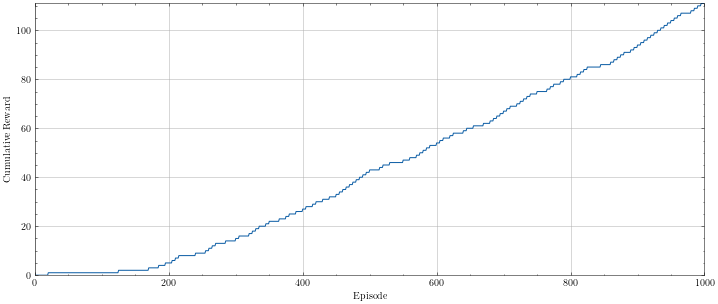

In [64]:
fig = plt.figure(figsize=(12, 5))
plt.grid()
plt.plot(np.cumsum(train_rewards))
plt.ylabel('Cumulative Reward')
plt.xlabel('Episode')
plt.xlim([0, EPISODES])
plt.ylim([0, np.amax(np.cumsum(train_rewards))])
plt.legend()